In [23]:
import pandas as pd #Manipulação de dados
import numpy as np #Manipulação de dados



import warnings #Utilizada para avisos de alertas
warnings.filterwarnings("ignore") #Ignorar avisos de alertas. Obs.: Alertas NÃO são erros, são apenas mensagens informativas

# Para não limitar a exibição do DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
df = pd.read_csv('../data/train.csv', sep=',')
df_test = pd.read_csv('../data/test.csv', sep=',')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 🧠 Entendendo e explorando o DataFrame

In [25]:
df.shape

(614, 13)

In [26]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 🧾 Tradução sugerida das colunas

Loan_ID	----- ID_Empréstimo

Gender ----- Genero

Married ----- Casado

Dependents ----- Dependentes

Education ----- Escolaridade

Self_Employed ----- Autônomo

ApplicantIncome	----- Renda_Solicitante

CoapplicantIncome -----	Renda_CoSolicitante

LoanAmount ----- Valor_Emprestimo

Loan_Amount_Term -----	Prazo_Emprestimo

Credit_History -----	Historico_Credito

Property_Area -----	Area_Propriedade

Loan_Status ----- Aprovado

In [28]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 🧠 Tratando os valores


### Vou utilizar a seguinte regra para tratamento
Dados categóricos => preencher com a moda

Dados numéricos => preencher com a média

In [29]:
colunas_categoricas_null= []
for i in df.columns:
    if df[i].dtype == 'object' and df[i].isna().any():
        colunas_categoricas_null.append(i)
    
colunas_categoricas_null

for col in colunas_categoricas_null:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Preenchendo valores numéricos com a mediana
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Preenchendo Credit_History com a moda (também é categórica, mas é 1 ou 0)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Preenchendo Credit_History com a moda (também é categórica, mas é 1 ou 0)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


df.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
col_cat = []
for i in df.columns:
    if df[i].dtype == 'object':
        col_cat.append(i)
    
col_cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [31]:
#Removendo a Load_id porque não vamos utilizar
df.drop('Loan_ID', axis=1, inplace=True)

In [32]:
col_cat.remove('Loan_ID')

In [33]:
from sklearn.preprocessing import LabelEncoder

labEnc = LabelEncoder()

for col in col_cat:
    df[col] = labEnc.fit_transform(df[col])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
import seaborn as sns #visualização de gráficos
import matplotlib.pyplot as plt #visualização de gráficos

sns.set(style="whitegrid")


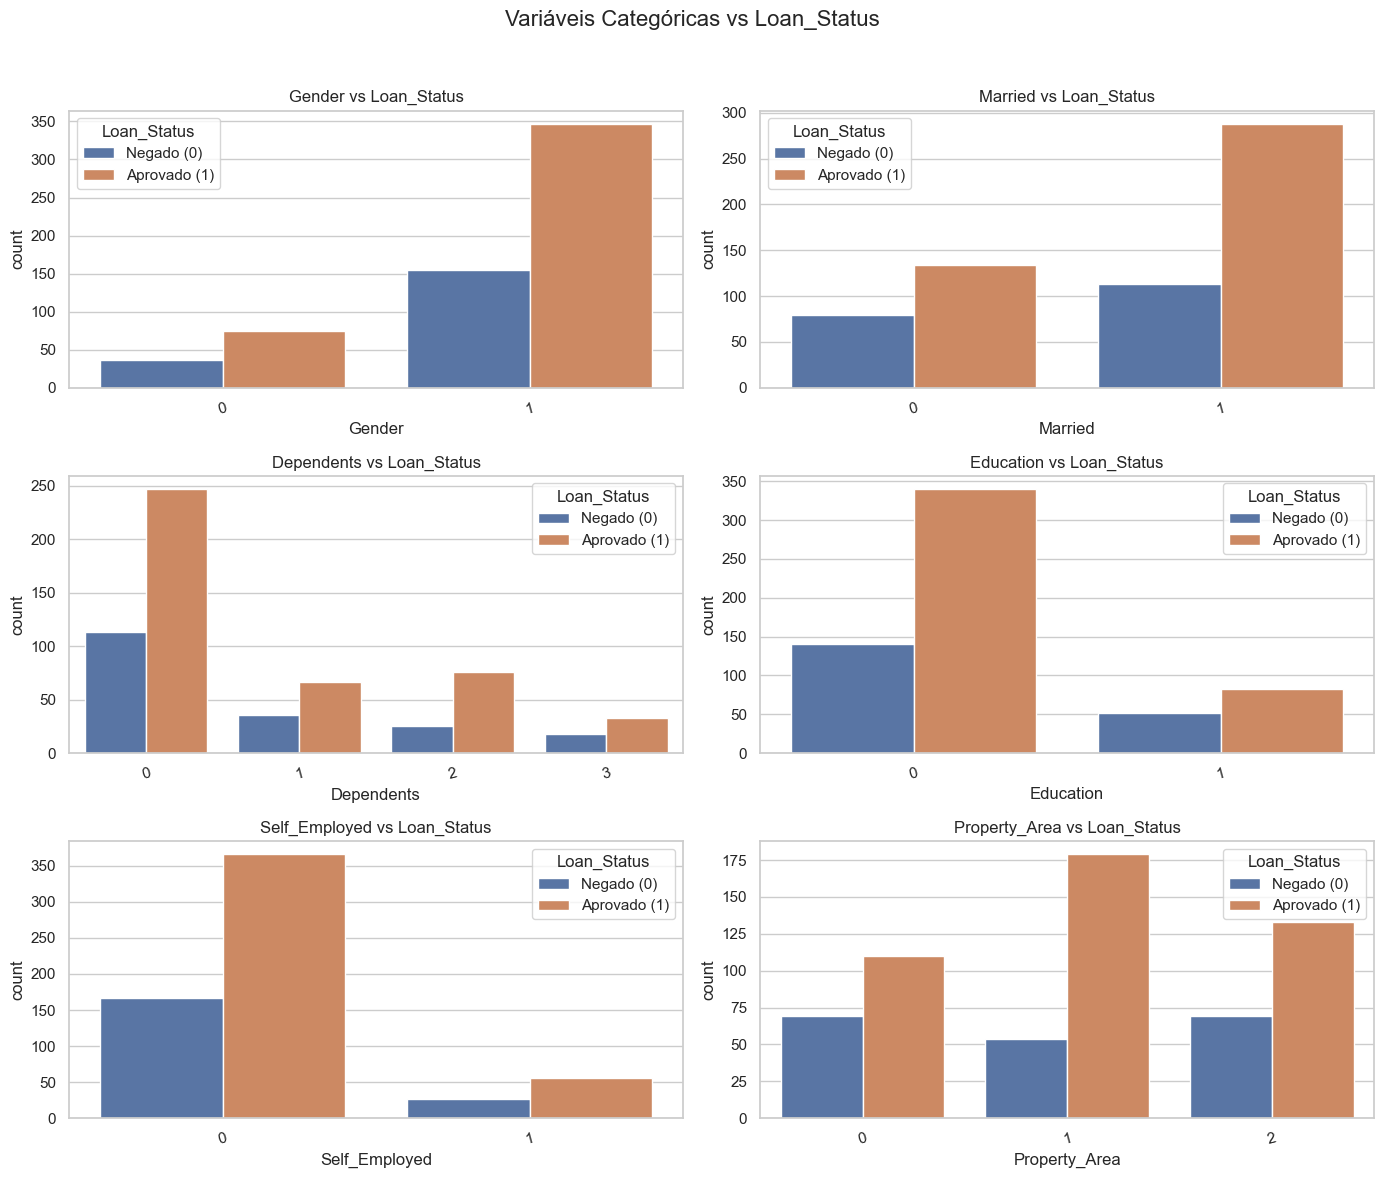

In [35]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education',
                       'Self_Employed', 'Property_Area']

# Define layout do painel
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols  # número de linhas baseado no nº de colunas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
fig.suptitle('Variáveis Categóricas vs Loan_Status', fontsize=16)

# Ajusta para o caso de ter só uma linha
axes = axes.flatten()

# Cria os gráficos
for idx, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='Loan_Status', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Loan_Status')
    axes[idx].legend(title='Loan_Status', labels=['Negado (0)', 'Aprovado (1)'])
    axes[idx].tick_params(axis='x', rotation=15)

# Remove espaços vazios se houver menos gráficos que espaços
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # deixa espaço pro título geral
plt.show()


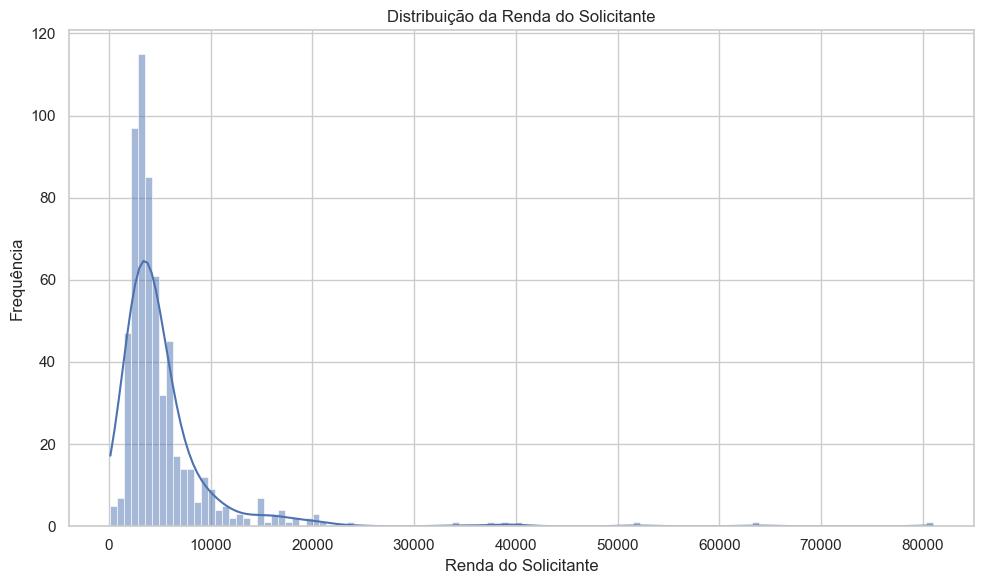

In [36]:
# Plot extra: distribuição da renda
plt.figure(figsize=(10, 6))  # largura = 10, altura = 6
sns.histplot(data=df, x='ApplicantIncome', kde=True)
plt.title("Distribuição da Renda do Solicitante")
plt.xlabel("Renda do Solicitante")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


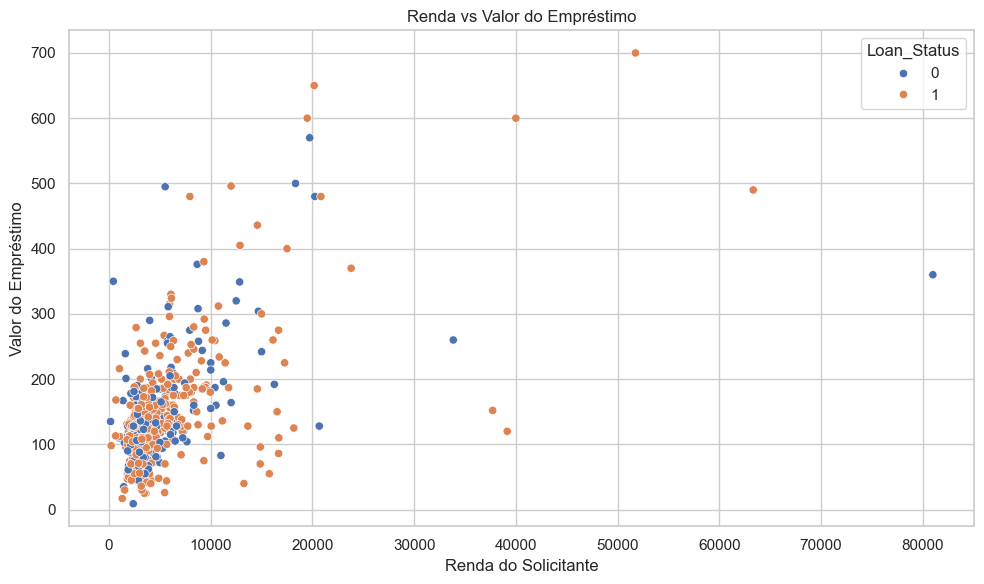

In [37]:
# Scatter plot: Renda x Valor do Empréstimo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Renda vs Valor do Empréstimo")
plt.xlabel("Renda do Solicitante")
plt.ylabel("Valor do Empréstimo")
plt.tight_layout()
plt.show()

In [38]:
correlation_matrix = df.corr()

correlation_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


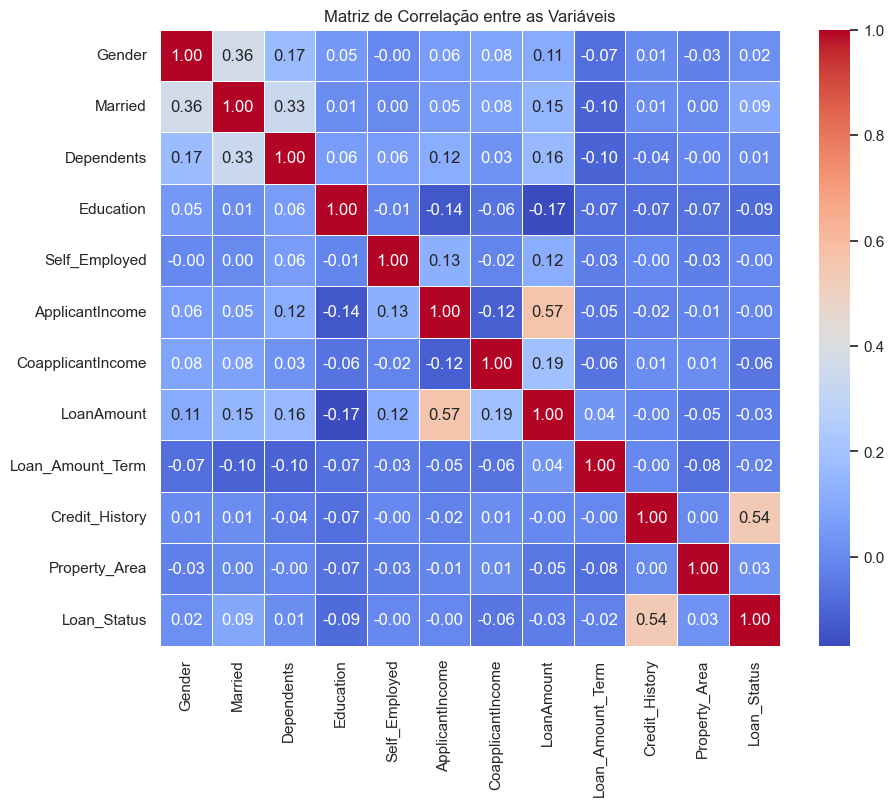

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()


In [40]:
df['Loan_Status'].value_counts(normalize=True) * 100


Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64

# 🧠 Agora vamos começar a mexer com os modelos de ML


### Vou trabalhar dois modelos, um balanceada e outra com sem balancemaneto.



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [45]:
#Separando as inforamções
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

#Vou utilizar uma tecninca de utilizar o stratify com y para evitar sorteios desbalanceados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [46]:
#Treinando modelo sem balanceamento
model_sem_bal = LogisticRegression(random_state=42)
model_sem_bal.fit(X_train, y_train)

y_pred_sem = model_sem_bal.predict(X_test)

print("🔹 Modelo SEM Balanceamento:")
print(classification_report(y_test, y_pred_sem))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_sem))

🔹 Modelo SEM Balanceamento:
              precision    recall  f1-score   support

           0       0.89      0.57      0.69        58
           1       0.83      0.97      0.89       127

    accuracy                           0.84       185
   macro avg       0.86      0.77      0.79       185
weighted avg       0.85      0.84      0.83       185

Matriz de Confusão:
 [[ 33  25]
 [  4 123]]


In [49]:
#Treinando com balanceamento e utilizando o oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


model_com_balanceamento = LogisticRegression(random_state=42)
model_com_balanceamento.fit(X_resampled, y_resampled)

y_pred_com = model_com_balanceamento.predict(X_test)

print("\n🔹 Modelo COM Balanceamento (RandomOverSampler):")
print(classification_report(y_test, y_pred_com))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_com))



🔹 Modelo COM Balanceamento (RandomOverSampler):
              precision    recall  f1-score   support

           0       0.64      0.67      0.66        58
           1       0.85      0.83      0.84       127

    accuracy                           0.78       185
   macro avg       0.74      0.75      0.75       185
weighted avg       0.78      0.78      0.78       185

Matriz de Confusão:
 [[ 39  19]
 [ 22 105]]


In [52]:
#Treinando com balanceamento e utilizando o SMOTE
smo = SMOTE(random_state=42)
X_smote, y_smote = smo.fit_resample(X_train, y_train)

model_com_smote = LogisticRegression(random_state=42)
model_com_smote.fit(X_smote, y_smote)

y_pred_smote = model_com_smote.predict(X_test)


print("\n🔹 Modelo COM Balanceamento (SMOTE):")
print(classification_report(y_test, y_pred_smote))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_smote))


🔹 Modelo COM Balanceamento (SMOTE):
              precision    recall  f1-score   support

           0       0.62      0.69      0.65        58
           1       0.85      0.80      0.83       127

    accuracy                           0.77       185
   macro avg       0.73      0.75      0.74       185
weighted avg       0.78      0.77      0.77       185

Matriz de Confusão:
 [[ 40  18]
 [ 25 102]]


## 📊 Interpretando os resultados

accuray	----- total de acertos

precision ----- qualidade dos previstos positivos

recall ----- quantos dos casos positivos reais o modelo acertou

f1-score ----- Média entre precision e recall


In [59]:

from sklearn.metrics import confusion_matrix


def plot_matriz(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm/ cm.sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', cbar=False,
                xticklabels=['Negado (0)', 'Aprovado (1)'],
                yticklabels=['Negado (0)', 'Aprovado (1)'],
                ax=ax)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')
    ax.set_title(title)


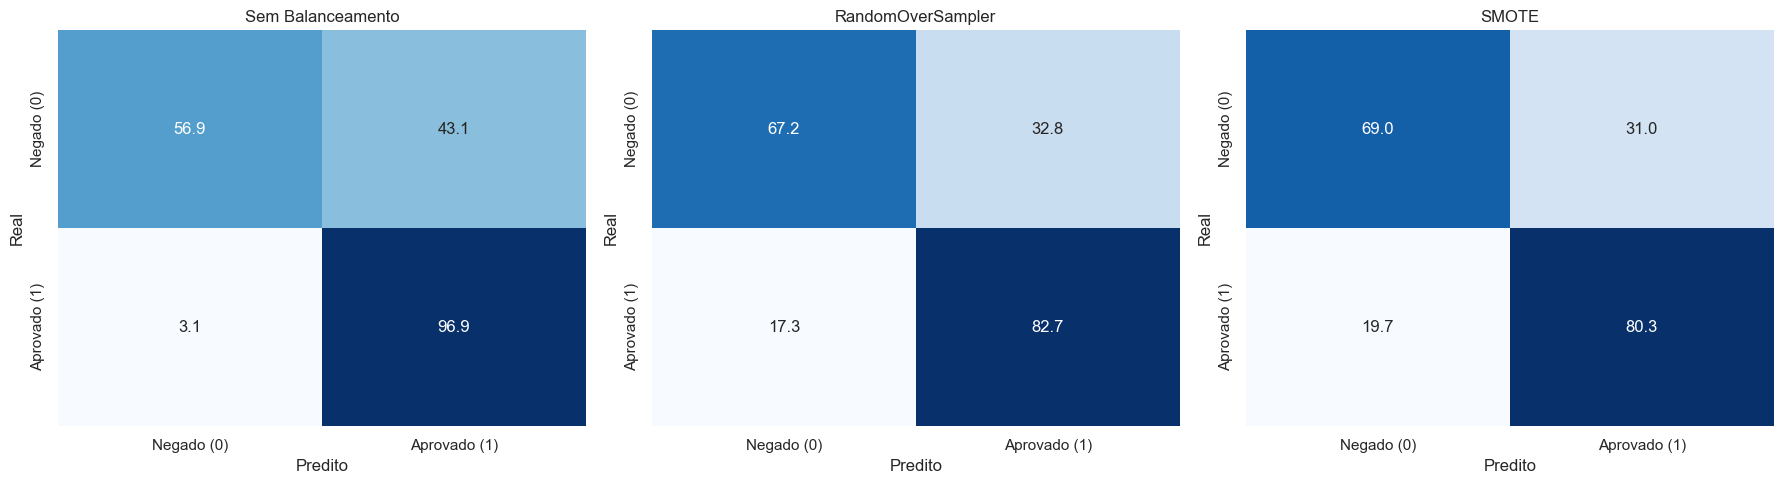

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Modelo sem balanceamento
plot_matriz(axes[0], y_test, y_pred_sem, 'Sem Balanceamento')

# Modelo com RandomOverSampler
plot_matriz(axes[1], y_test, y_pred_com, 'RandomOverSampler')

# Modelo com SMOTE
plot_matriz(axes[2], y_test, y_pred_smote, 'SMOTE')

plt.tight_layout()
plt.show()

In [61]:
import joblib

# Salvar o modelo com melhor performance
joblib.dump(model_com_smote, 'modelo_emprestimo.pkl')


['modelo_emprestimo.pkl']